In [17]:
import pandas as pd
import os
import numpy as np
import random
from boruta import BorutaPy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("D:/MS in Data Analytics/DMML/Project/project work/Diabetes/datasource/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [19]:
df.shape

(70692, 22)

In [4]:
pd.set_option('display.max_columns', 500)
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

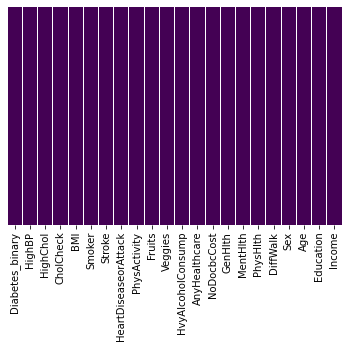

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')
plt.savefig("heatmap.png")

In [6]:
pd.set_option('display.max_columns',500)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
df.Diabetes_binary.value_counts()

1.0    35346
0.0    35346
Name: Diabetes_binary, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
df_x = df.iloc[:,1:]
df_y = df.iloc[:,0]

In [10]:
df_x_train, df_x_test, df_y_train,  df_y_test = train_test_split(df_x,df_y,test_size=0.2)

#### Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques
Authors: Zidian Xie, PhD1,2; Olga Nikolayeva, MS2; Jiebo Luo, PhD3; Dongmei Li, PhD1

In this research,various predictive algorithms have been built to predict risk factors of tyoe 2 diabetes.
Since this research was done using survey data collected by CDC governemrt website

### Random Forest

In [11]:
rfc = RandomForestClassifier(n_estimators= 500)

In [12]:
rfc.fit(df_x_train,df_y_train)
predicted = rfc.predict(df_x_test)

In [13]:
tab_rf = confusion_matrix(df_y_test,predicted)
tab_rf

array([[5023, 2174],
       [1508, 5434]], dtype=int64)

In [14]:
print(classification_report(df_y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7197
         1.0       0.71      0.78      0.75      6942

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [26]:
# False Positive Rate:
negatives = tab_rf[:,1].sum()
false_positive_rate = tab_rf[1,1] + negatives
false_positive_rate

13042

### Decision tree

In [15]:
dt = DecisionTreeClassifier(min_samples_split=50)
dt.fit(df_x_train , df_y_train)

DecisionTreeClassifier(min_samples_split=50)

In [16]:
dt_predicted = dt.predict(df_x_test)

In [21]:
# accuracy
accuracy_rf = tab_rf.diagonal().sum()* 100 / tab_rf.sum()
accuracy_rf

73.59077728269325

In [22]:
# False positive rate

In [23]:
# Determining importance of features
# imp_features_RF = pd.DataFrame({'Features': rfc.feature_names_in_ , 'Importance' : rfc.feature_importances_})
# imp_features_RF.sort_values("Importance",ascending = True)

### Adaptive boosting

In [34]:
dt = DecisionTreeClassifier()
abc = AdaBoostClassifier(n_estimators=100)

In [35]:
abc.fit(df_x_train,df_y_train)

AdaBoostClassifier(n_estimators=100)

In [36]:
abc_predicted = abc.predict(df_x_test)

In [37]:
tab_abc = confusion_matrix(df_y_test,abc_predicted)
tab_abc

array([[5282, 1915],
       [1564, 5378]], dtype=int64)

In [38]:
print(classification_report(df_y_test,abc_predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      7197
         1.0       0.74      0.77      0.76      6942

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [39]:
negatives_abc = tab_abc[:,1].sum()
false_positive_rate_abc = tab_abc[1,1] + negatives_abc
false_positive_rate_abc

12671

#### Random Forest

In [29]:
tab_rf = confusion_matrix(df_y_test,predicted)
tab_rf

array([[4890, 2137],
       [1597, 5515]], dtype=int64)

In [30]:
print(classification_report(df_y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      7027
         1.0       0.72      0.78      0.75      7112

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [32]:
negatives_rf = tab_rf[:,1].sum()
false_positive_rate_rf = tab_rf[1,1] + negatives
false_positive_rate_rf

13042

### Decision tree

In [29]:
tab_dt = confusion_matrix(df_y_test,dt_predicted)
tab_dt

array([[5185, 2012],
       [1853, 5089]], dtype=int64)

In [30]:
print(classification_report(df_y_test,dt_predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      7197
         1.0       0.72      0.73      0.72      6942

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



In [31]:
negatives_dt = tab_dt[:,1].sum()
false_positive_rate_dt = tab_dt[1,1] + negatives
false_positive_rate_dt

12697